## 타이타닉호 생존율 분석

### 상관분석, 상관계수, 피어슨 상관계수, 히트맵

#### dataset 수집

#### 기본 패키지 import

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.to_csv('./data/titanic.csv',index=True, encoding='utf-8')

#### 결측치 파악

In [3]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### age 결측치(177건)를 치환

- 891명 데이터에서 중앙값을 찾아서 그 값으로 결측치를 치환

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 중앙값
median = titanic['age'].median()
median

28.0

In [7]:
titanic.age.mean()

29.69911764705882

In [8]:
# 나이 결측치 치환
titanic['age'] = titanic['age'].fillna(median)

In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
# 승선장소 확인
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [11]:
# 승선장소 대부분이 S이므로 결측치를 S로 할당
titanic.embarked = titanic.embarked.fillna('S')

In [12]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [13]:
titanic.embark_town = titanic.embark_town.fillna('Southampton')

In [14]:
# 승선 데크를 확인
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [15]:
titanic.deck = titanic.deck.fillna('C')

In [16]:
# 결측치 여부 재조회
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

#### 기본 정보 확인

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
titanic.survived.value_counts()  # 0이 사망자 / 1이 생존자

0    549
1    342
Name: survived, dtype: int64

#### 차트 시각화

In [19]:
import matplotlib.pyplot as plt

##### 성별에 따른 생존율 파이차트

In [20]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

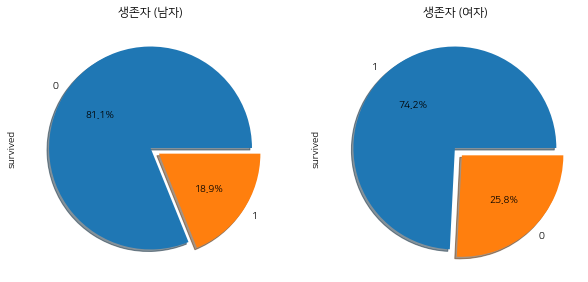

In [27]:
f, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')
plt.rcParams['font.family'] = 'NanumSquare'

titanic.survived[titanic.sex == 'male'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], explode=[0,0.1], shadow=True)
titanic.survived[titanic.sex == 'female'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], explode=[0,0.1], shadow=True)

ax[0].set_title('생존자 (남자)')
ax[1].set_title('생존자 (여자)')
plt.show()

##### 등급별 생존자 수 차트

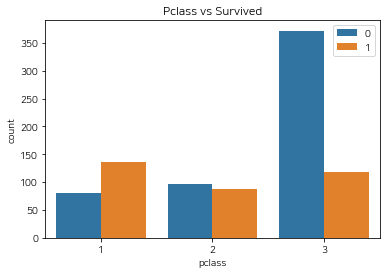

In [22]:
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title('Pclass vs Survived')
plt.legend()
plt.show()

#### 상관분석

##### 상관계수 확인

In [23]:
titanic_corr = titanic.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [24]:
titanic.survived.corr(titanic.adult_male)

-0.5570800422053257

#### 결과 시각화

In [25]:
# 데이터 타입 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


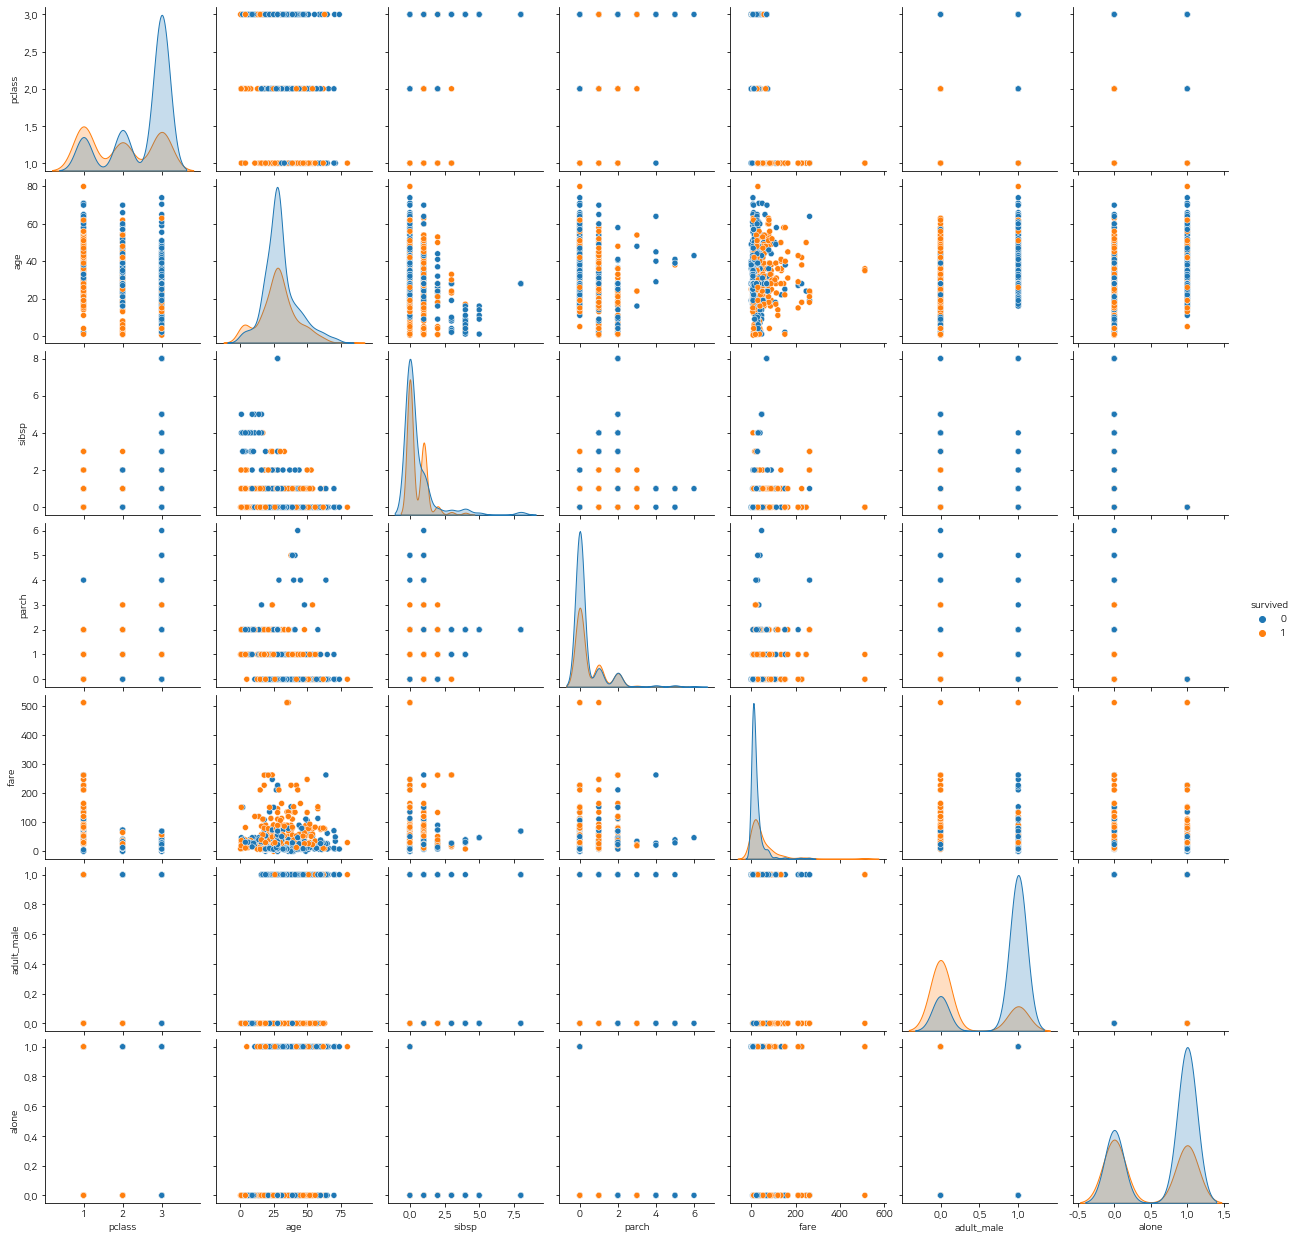

In [26]:
# sns.set(style='ticks', color_codes=True)

# 오류 : object arrays are not supported
# bool타입은 산점도에서 오류를 내기 때문에 bool을 int32로 형변환 후 작업
titanic = titanic.astype({'adult_male':'int32', 'alone':'int32'})

sns.pairplot(titanic, hue='survived')
plt.show()

#### 결과 시각화

##### 산점도(Scatter Plot) 상관분석 시각화

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int32   
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    int32   
dtypes: category(2), float64(2), int32(2), int64(4), object(5)
memory usage: 85.9+ KB


##### 두 변수간의 상관관계를 시각화

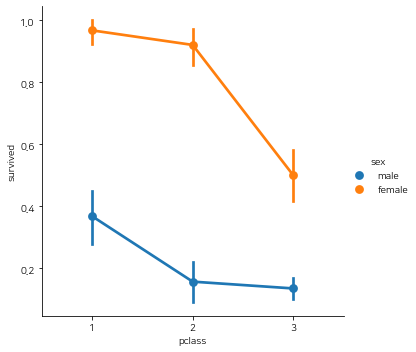

In [29]:
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')
plt.show()

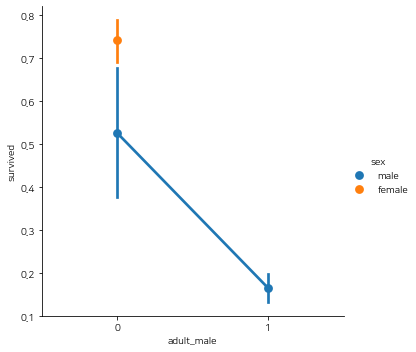

In [30]:
sns.catplot(x='adult_male', y='survived', hue='sex', data=titanic, kind='point')
plt.show()

##### 변수 사이의 상관계수를 히트맵으로 시각화

In [31]:
def category_age(x):   # 연령대 가져오기 함수
    if x < 10: return 0
    elif x < 20: return 1
    elif x < 30: return 2
    elif x < 40: return 3
    elif x < 50: return 4
    elif x < 60: return 5
    elif x < 70: return 6
    else: return 7

In [32]:
titanic['age_band'] = titanic['age'].apply(category_age)

In [33]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [35]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [36]:
titanic.to_csv('./data/titanic_datahandling.csv', index=False, encoding='utf-8')

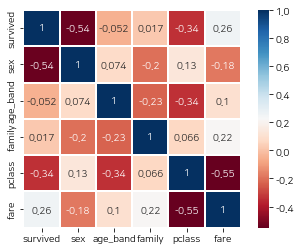

In [43]:
# 히트맵그리기
heatmap_data = titanic[['survived', 'sex', 'age_band', 'family', 'pclass', 'fare']]
color_map = plt.cm.RdBu

sns.heatmap(data=heatmap_data.astype(float).corr(), linewidths=0.1, square=True, cmap=color_map, annot=True)
plt.show()